In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
import warnings
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
#from costcla.models import CostSensitiveDecisionTreeClassifier
#from costcla.metrics import savings_score
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from collections import Counter
from collections import defaultdict

In [2]:
#Importing the dataset 
df=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleaned.csv")
test=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleanedTest.csv")


In [3]:
#Drop the useless column
df.drop(['Unnamed: 0'], axis=1, inplace =True)
df.drop(['date'], axis=1, inplace =True)
df.drop(['DayName'], axis=1, inplace =True)

test.drop(['Unnamed: 0'], axis=1, inplace =True)
test.drop(['date'], axis=1, inplace =True)
test.drop(['DayName'], axis=1, inplace =True)

In [4]:
#preparing the two datasets splitting the attributes with the class 
attributes = [col for col in df.columns if 
              col == 'IsWorkDay' 
              or col == 'Hour' 
              or col == 'Light'
              or col == 'IsWorkHour'
              or col == 'Temperature' 
              or col == 'Humidity'
              or col == 'CO2'
              or col == 'HumidityRatio'
             ]
X_train = df[attributes].values
y_train = df['Occupancy']

attributes = [col for col in df.columns if 
              col == 'IsWorkDay' 
              or col == 'Hour' 
              or col == 'Light'
              or col == 'IsWorkHour'
              or col == 'Temperature' 
              or col == 'Humidity'
              or col == 'CO2'
              or col == 'HumidityRatio'
             ]
X_test = test[attributes].values
y_test = test['Occupancy']

In [5]:
print('Dataset shape %s' % Counter(df['Occupancy']))

Dataset shape Counter({0: 6414, 1: 326})


In [6]:
print('Dataset shape %s' % Counter(test['Occupancy']))

Dataset shape Counter({0: 1693, 1: 71})


In [7]:
#Try the classification using the ORIGINAL decision tree with the ORIGINAL prepared dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

clfG = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                             min_samples_split=2, min_samples_leaf=1)
clfG.fit(X_train, y_train)
y_predG = clfG.predict(X_test)
y_predGproba = clfG.predict_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_predG))
print('F1-score %s' % f1_score(y_test, y_predG, average=None))
print(classification_report(y_test, y_predG))
confusion_matrix(y_test, y_predG)

Accuracy 0.9642857142857143
F1-score [0.98151951 0.47058824]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1693
           1       0.58      0.39      0.47        71

    accuracy                           0.96      1764
   macro avg       0.78      0.69      0.73      1764
weighted avg       0.96      0.96      0.96      1764



array([[1673,   20],
       [  43,   28]])

In [8]:
#Print the REAL roc value
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()
fpr, tpr, _ = roc_curve(y_test, y_predG)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_predG, average=None)

0.6912764240493166


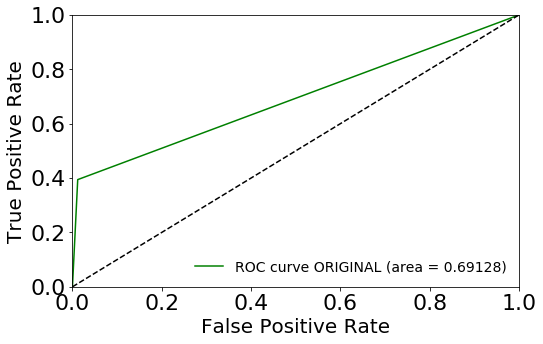

In [9]:
#Plotting the graph of the REAL Roc curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve ORIGINAL (area = %0.5f)' % roc_auc, color='Green')
#plt.plot(fprE, tprE, label='ROC curve Gain (area = %0.5f)' % (roc_aucE))
#plt.plot(fprRF, tprRF, label='ROC curve Random Forest (area = %0.5f)' % (roc_aucRF))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [10]:
len(X_test)

1764

In [11]:
#Reducing the dataset to two attributes
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

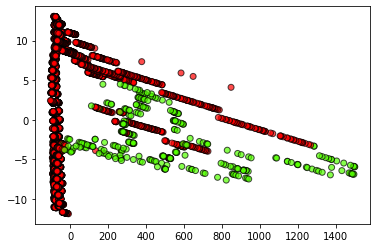

In [12]:
#Plot the dataset with 2 attributes
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [13]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 326, 1: 326})


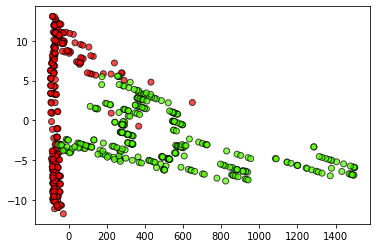

In [14]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [15]:
clfRU = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                             min_samples_split=2, min_samples_leaf=1)
clfRU.fit(X_res, y_res)
y_predRU = clfRU.predict(X_test)
y_predRUproba = clfRU.predict_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_predRU))
print('F1-score %s' % f1_score(y_test, y_predRU, average=None))
print(classification_report(y_test, y_predRU))
confusion_matrix(y_test, y_predRU)

Accuracy 0.95578231292517
F1-score [0.9764208  0.64545455]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1693
           1       0.48      1.00      0.65        71

    accuracy                           0.96      1764
   macro avg       0.74      0.98      0.81      1764
weighted avg       0.98      0.96      0.96      1764



array([[1615,   78],
       [   0,   71]])

In [16]:
#Print the roc value RANDOM UNDERSAMPLING
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()
fprRU, tprRU, _ = roc_curve(y_test, y_predRU)
roc_aucRU = auc(fprRU, tprRU)
print(roc_aucRU)

roc_aucRU = roc_auc_score(y_test, y_predRU, average=None)

0.9769639692852924


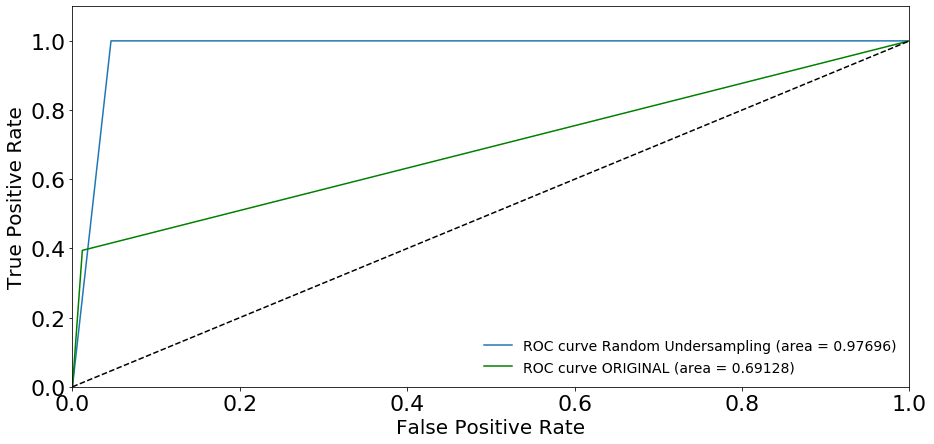

In [17]:
#Plotting the graph of the  Roc curve RANDOM UNDERSAMPLING
plt.figure(figsize=(15, 7))
plt.plot(fprRU, tprRU, label='ROC curve Random Undersampling (area = %0.5f)' % roc_aucRU)
plt.plot(fpr, tpr, label='ROC curve ORIGINAL (area = %0.5f)' % roc_auc, color='Green')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [18]:
warnings.simplefilter("ignore")

In [19]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=3)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 326, 0: 172})


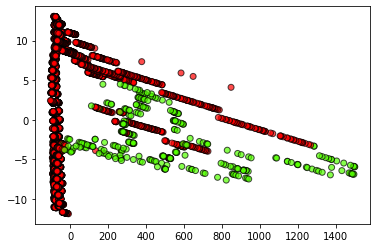

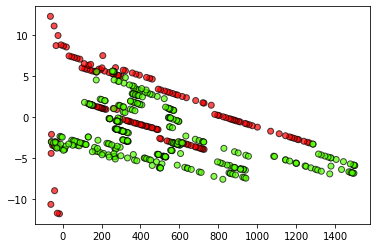

In [20]:
X_pca = pca.transform(X_train)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.9739229024943311
F1-score [0.98633393 0.71604938]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1693
           1       0.64      0.82      0.72        71

    accuracy                           0.97      1764
   macro avg       0.81      0.90      0.85      1764
weighted avg       0.98      0.97      0.98      1764

[[1660   33]
 [  13   58]]



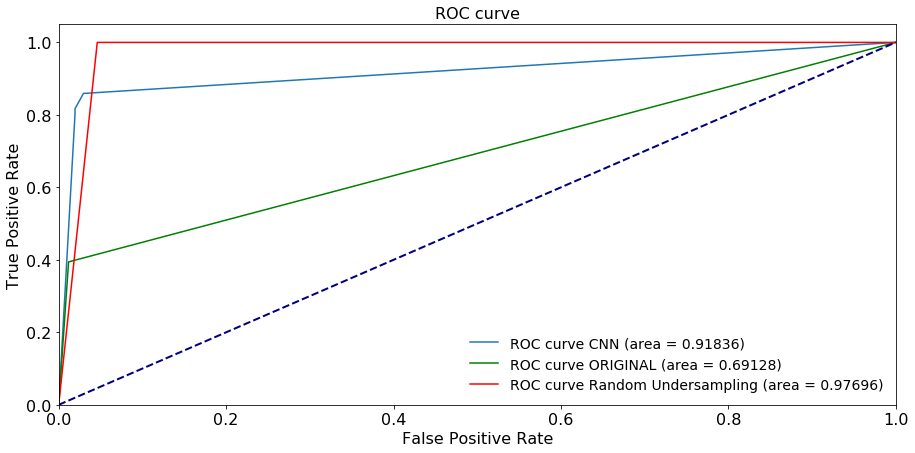

In [22]:
clfCNN = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clfCNN.fit(X_res, y_res)

y_predCNN = clfCNN.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_predCNN))
print('F1-score %s' % f1_score(y_test, y_predCNN, average=None))
print(classification_report(y_test, y_predCNN))
print(confusion_matrix(y_test, y_predCNN))
print()

y_score = clfCNN.predict_proba(X_test)
fprCNN, tprCNN, _ = roc_curve(y_test, y_score[:, 1])
roc_aucCNN = auc(fprCNN, tprCNN)

plt.figure(figsize=(15, 7))
plt.plot(fprCNN, tprCNN, label='ROC curve CNN (area = %0.5f)' % roc_aucCNN)
plt.plot(fpr, tpr, label='ROC curve ORIGINAL (area = %0.5f)' % roc_auc, color='Green')
plt.plot(fprRU, tprRU, label='ROC curve Random Undersampling (area = %0.5f)' % roc_aucRU, color='Red')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [23]:
cnn = CondensedNearestNeighbour(random_state=42, n_neighbors=1, n_jobs=3)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

clfCNN = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clfCNN.fit(X_res, y_res)

y_predCNN = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_predCNN))
print('F1-score %s' % f1_score(y_test, y_predCNN, average=None))
print(classification_report(y_test, y_predCNN))
print(confusion_matrix(y_test, y_predCNN))
print()

y_score = clfCNN.predict_proba(X_test)
fprCNN, tprCNN, _ = roc_curve(y_test, y_score[:, 1])
roc_aucCNN = auc(fprCNN, tprCNN)

plt.figure(figsize=(15, 7))
plt.plot(fprRU, tprRU, label='ROC curve CNN (area = %0.5f)' % roc_aucCNN)
plt.plot(fpr, tpr, label='ROC curve ORIGINAL (area = %0.5f)' % roc_auc, color='Green')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

KeyboardInterrupt: 

In [ ]:
#See the accuracy with the different values of n_jobs
#accuracy = []
#for count in range(1,6):
#    cnn = CondensedNearestNeighbour(random_state=42, n_jobs=count)
#    X_res, y_res = cnn.fit_resample(X_train, y_train)
#    print('Resampled dataset shape %s' % Counter(y_res))
#    clfCNN = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
#                             min_samples_split=2, min_samples_leaf=1)
#    clfCNN.fit(X_res, y_res)
#    y_predCNN = clfCNN.predict(X_test)
#    print('n_jobs= %s' % count)
#    print('Accuracy %s' % accuracy_score(y_test, y_predCNN))
#    print('F1-score %s' % f1_score(y_test, y_predCNN, average=None))
#    accuracy.append(accuracy_score(y_test, y_predCNN))

In [ ]:
#Graph of the variation of the accuracy at the variation of K
#plt.figure(figsize=(20, 6))
#plt.plot(range(1, 6), accuracy, color='blue', linestyle='dashed', marker='o',
#         markerfacecolor='red', markersize=10)
#plt.title('Accuracy Rate n_jobs Value')
#plt.xlabel('n_jobs Value')
#plt.ylabel('Accuracy')

In [24]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 6414, 0: 6414})


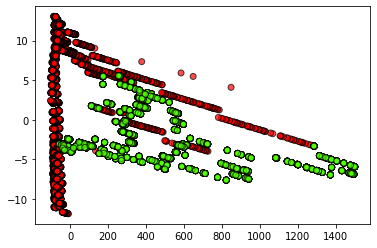

In [25]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.9807256235827665
F1-score [0.98995865 0.76056338]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1693
           1       0.76      0.76      0.76        71

    accuracy                           0.98      1764
   macro avg       0.88      0.88      0.88      1764
weighted avg       0.98      0.98      0.98      1764

[[1676   17]
 [  17   54]]



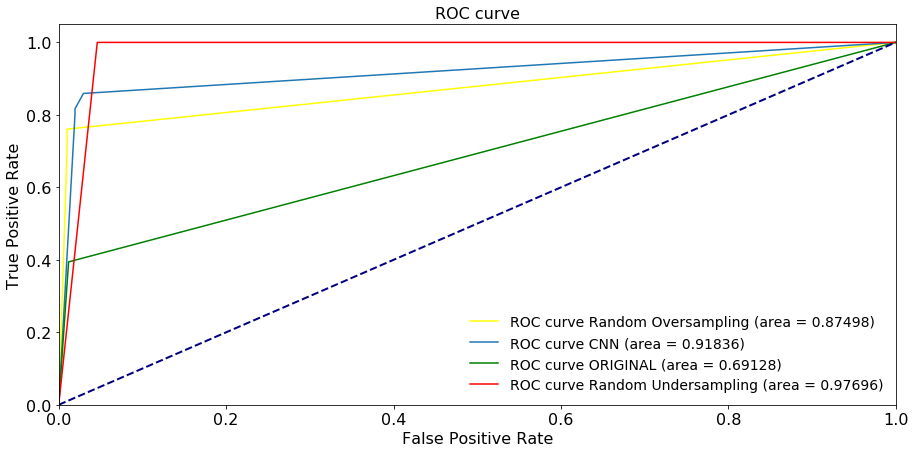

In [26]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

y_score = clf.predict_proba(X_test)
fprRO, tprRO, _ = roc_curve(y_test, y_score[:, 1])
roc_aucRO = auc(fprRO, tprRO)

plt.figure(figsize=(15, 7))
plt.plot(fprRO, tprRO, label='ROC curve Random Oversampling (area = %0.5f)' % roc_aucRO, color='Yellow')
plt.plot(fprCNN, tprCNN, label='ROC curve CNN (area = %0.5f)' % roc_aucCNN)
plt.plot(fpr, tpr, label='ROC curve ORIGINAL (area = %0.5f)' % roc_auc, color='Green')
plt.plot(fprRU, tprRU, label='ROC curve Random Undersampling (area = %0.5f)' % roc_aucRU, color='Red')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [41]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 6414, 0: 6414})


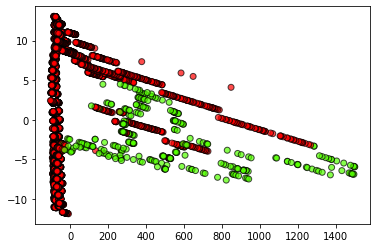

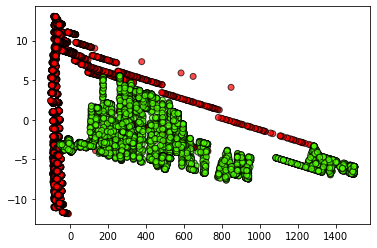

In [42]:
X_pca = pca.transform(X_train)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

X_pcaT = pca.transform(X_test)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

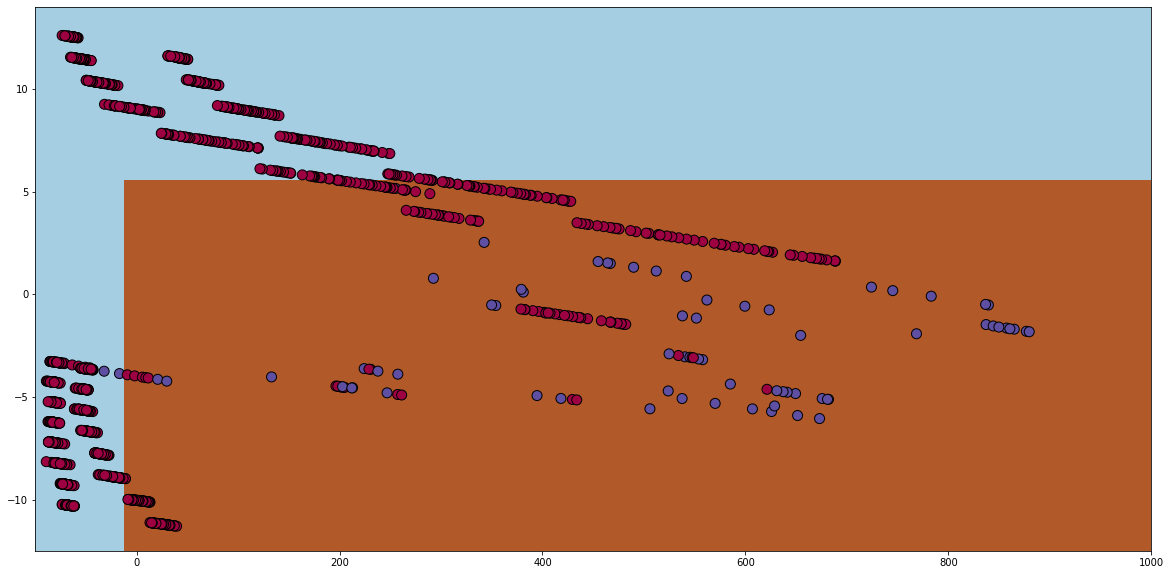

In [49]:
#SMOOTE
X = X_pca
y = y_res
h = .02  # step size in the mesh

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots(figsize=(20, 10))
plt.xlim([-100.0, 1000.0])
plt.ylim([-12.5, 14.0])
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
#ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k')
ax.scatter(X_pcaT[:, 0], X_pcaT[:, 1], c=y_test, cmap=plt.cm.Spectral, edgecolor='k', s=100)

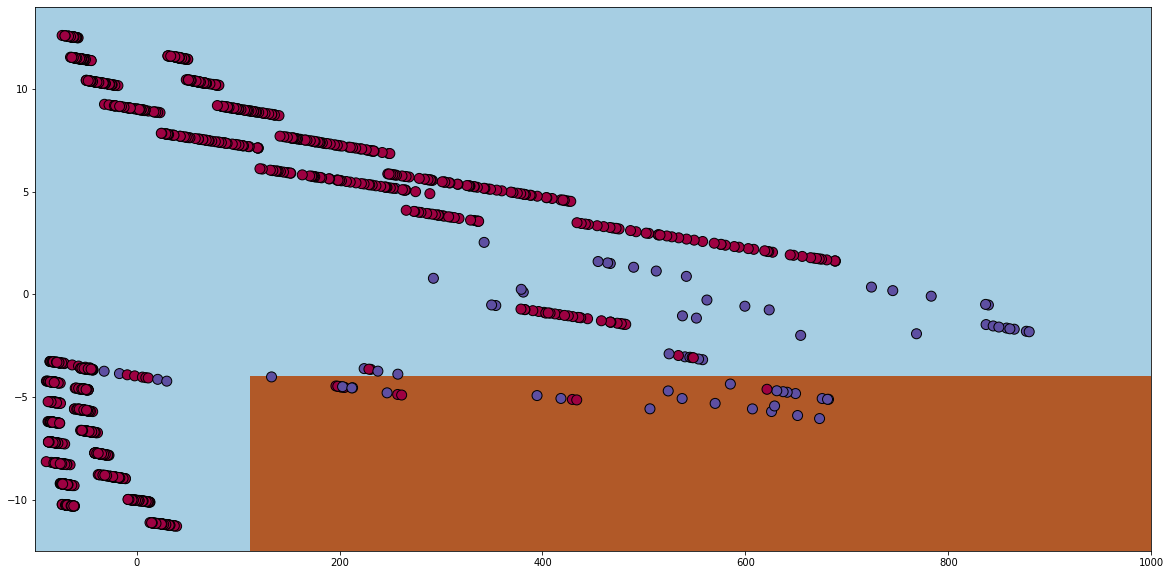

In [50]:
#NORMAL
X = pca.transform(X_train)
y = y_train
h = .02  # step size in the mesh

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots(figsize=(20, 10))
plt.xlim([-100.0, 1000.0])
plt.ylim([-12.5, 14.0])
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
#ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k')
ax.scatter(X_pcaT[:, 0], X_pcaT[:, 1], c=y_test, cmap=plt.cm.Spectral, edgecolor='k', s=100)

Accuracy 0.967687074829932
F1-score [0.98295964 0.68852459]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.56      0.89      0.69        71

    accuracy                           0.97      1764
   macro avg       0.78      0.93      0.84      1764
weighted avg       0.98      0.97      0.97      1764

[[1644   49]
 [   8   63]]



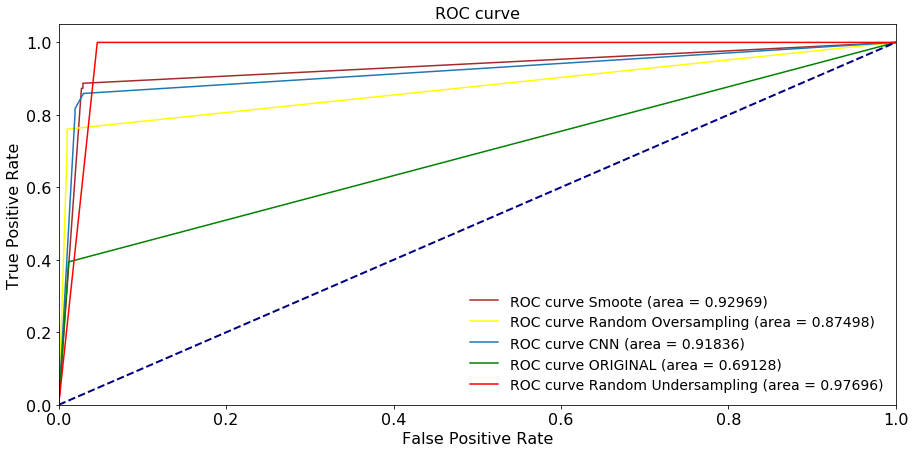

In [31]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

y_score = clf.predict_proba(X_test)
fprS, tprS, _ = roc_curve(y_test, y_score[:, 1])
roc_aucS = auc(fprS, tprS)

plt.figure(figsize=(15, 7))
plt.plot(fprS, tprS, label='ROC curve Smoote (area = %0.5f)' % roc_aucS, color='Brown')
plt.plot(fprRO, tprRO, label='ROC curve Random Oversampling (area = %0.5f)' % roc_aucRO, color='Yellow')
plt.plot(fprCNN, tprCNN, label='ROC curve CNN (area = %0.5f)' % roc_aucCNN)
plt.plot(fpr, tpr, label='ROC curve ORIGINAL (area = %0.5f)' % roc_auc, color='Green')
plt.plot(fprRU, tprRU, label='ROC curve Random Undersampling (area = %0.5f)' % roc_aucRU, color='Red')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [58]:
# Calculating error for K values between 1 and 170
accuracy = []
for i in range(0, 10):
    for y in range(0, 10):
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3, class_weight={0:i, 1: y})
        clf.fit(X_train, y_train)
        pred_i = clf.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        print(i, y, accuracy_score(y_test, y_pred))

0 0 0.967687074829932
0 1 0.967687074829932
0 2 0.967687074829932
0 3 0.967687074829932
0 4 0.967687074829932
0 5 0.967687074829932
0 6 0.967687074829932
0 7 0.967687074829932
0 8 0.967687074829932
0 9 0.967687074829932
1 0 0.967687074829932
1 1 0.967687074829932
1 2 0.967687074829932
1 3 0.967687074829932
1 4 0.967687074829932
1 5 0.967687074829932
1 6 0.967687074829932
1 7 0.967687074829932
1 8 0.967687074829932
1 9 0.967687074829932
2 0 0.967687074829932
2 1 0.967687074829932
2 2 0.967687074829932
2 3 0.967687074829932
2 4 0.967687074829932
2 5 0.967687074829932
2 6 0.967687074829932
2 7 0.967687074829932
2 8 0.967687074829932
2 9 0.967687074829932
3 0 0.967687074829932
3 1 0.967687074829932
3 2 0.967687074829932
3 3 0.967687074829932
3 4 0.967687074829932
3 5 0.967687074829932
3 6 0.967687074829932
3 7 0.967687074829932
3 8 0.967687074829932
3 9 0.967687074829932
4 0 0.967687074829932
4 1 0.967687074829932
4 2 0.967687074829932
4 3 0.967687074829932
4 4 0.967687074829932
4 5 0.9676

Accuracy 0.971655328798186
F1-score [0.98511905 0.70238095]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1693
           1       0.61      0.83      0.70        71

    accuracy                           0.97      1764
   macro avg       0.80      0.90      0.84      1764
weighted avg       0.98      0.97      0.97      1764

[[1655   38]
 [  12   59]]



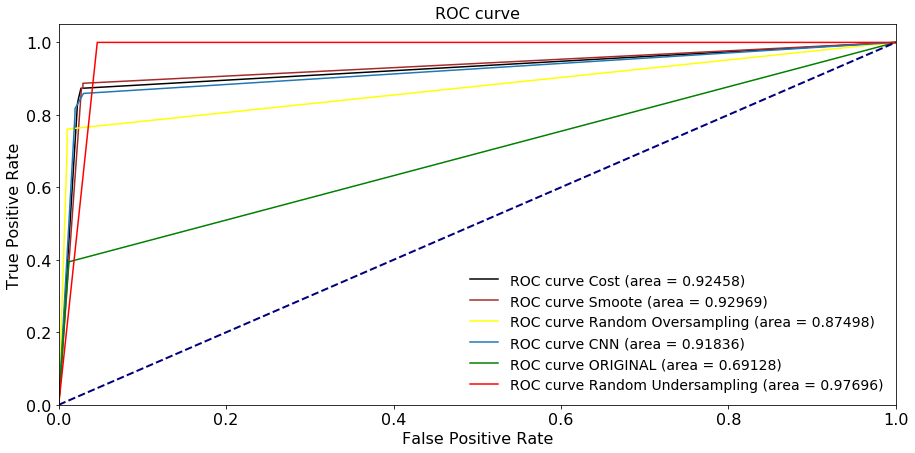

In [59]:
clf = DecisionTreeClassifier(min_samples_leaf=3, class_weight={0:9, 1: 1}, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

y_score = clf.predict_proba(X_test)
fprC, tprC, _ = roc_curve(y_test, y_score[:, 1])
roc_aucC = auc(fprC, tprC)

plt.figure(figsize=(15, 7))
plt.plot(fprC, tprC, label='ROC curve Cost (area = %0.5f)' % roc_aucC, color='Black')
plt.plot(fprS, tprS, label='ROC curve Smoote (area = %0.5f)' % roc_aucS, color='Brown')
plt.plot(fprRO, tprRO, label='ROC curve Random Oversampling (area = %0.5f)' % roc_aucRO, color='Yellow')
plt.plot(fprCNN, tprCNN, label='ROC curve CNN (area = %0.5f)' % roc_aucCNN)
plt.plot(fpr, tpr, label='ROC curve ORIGINAL (area = %0.5f)' % roc_auc, color='Green')
plt.plot(fprRU, tprRU, label='ROC curve Random Undersampling (area = %0.5f)' % roc_aucRU, color='Red')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

clfG = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1)
clfG.fit(X_train, y_train)
y_predG = clfG.predict(X_test)
y_predGproba = clfG.predict_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_predG))
print('F1-score %s' % f1_score(y_test, y_predG, average=None))
print(classification_report(y_test, y_predG))
confusion_matrix(y_test, y_predG)

In [ ]:
plot_roc(y_test, y_score)
plt.show()

In [ ]:
plot_precision_recall(y_test, y_score)
plt.show()

In [ ]:
plot_cumulative_gain(y_test, y_score)
plt.show()

In [ ]:
plot_lift_curve(y_test, y_score)
plt.show()